<a href="https://colab.research.google.com/github/james-monahan/Stats_Calc_Workshop/blob/main/Math9_Stats_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import random

#Data Preperation
---



In [2]:
link = "https://raw.githubusercontent.com/PacktWorkshops/The-Statistics-and-Calculus-with-Python-Workshop/master/Chapter07/data/appstore_games.csv"

In [3]:
games = pd.read_csv(link)

In [4]:
games.head()

,URL,ID,Name,Subtitle,Icon URL,Average User Rating,User Rating Count,Price,In-app Purchases,Description,Developer,Age Rating,Languages,Size,Primary Genre,Genres,Original Release Date,Current Version Release Date
0,https://apps.apple.com/us/app/sudoku/id284921427,284921427,Sudoku,NaN,https://is2-ssl.mzstatic.com/image/thumb/Purpl...,4.0,3553.0,2.99,NaN,"Join over 21,000,000 of our fans and download ...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",15853568.0,Games,"Games, Strategy, Puzzle",11/07/2008,30/05/2017
1,https://apps.apple.com/us/app/reversi/id284926400,284926400,Reversi,NaN,https://is4-ssl.mzstatic.com/image/thumb/Purpl...,3.5,284.0,1.99,NaN,"The classic game of Reversi, also known as Oth...",Kiss The Machine,4+,EN,12328960.0,Games,"Games, Strategy, Board",11/07/2008,17/05/2018
2,https://apps.apple.com/us/app/morocco/id284946595,284946595,Morocco,NaN,https://is5-ssl.mzstatic.com/image/thumb/Purpl...,3.0,8376.0,0.00,NaN,Play the classic strategy game Othello (also k...,Bayou Games,4+,EN,674816.0,Games,"Games, Board, Strategy",11/07/2008,5/09/2017
3,https://apps.apple.com/us/app/sudoku-free/id28...,285755462,Sudoku (Free),NaN,https://is3-ssl.mzstatic.com/image/thumb/Purpl...,3.5,190394.0,0.00,NaN,"Top 100 free app for over a year.\nRated ""Best...",Mighty Mighty Good Games,4+,"DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...",21552128.0,Games,"Games, Strategy, Puzzle",23/07/2008,30/05/2017
4,https://apps.apple.com/us/app/senet-deluxe/id2...,285831220,Senet Deluxe,NaN,https://is1-ssl.mzstatic.com/image/thumb/Purpl...,3.5,28.0,2.99,NaN,"""Senet Deluxe - The Ancient Game of Life and A...",RoGame Software,4+,"DA, NL, EN, FR, DE, EL, IT, JA, KO, NO, PT, RU...",34689024.0,Games,"Games, Strategy, Board, Education",18/07/2008,22/07/2018


In [5]:
original_colums_dict = {x: x.lower().replace(' ','_') \
                        for x in games.columns}
original_colums_dict 

{'Age Rating': 'age_rating',
 'Average User Rating': 'average_user_rating',
 'Current Version Release Date': 'current_version_release_date',
 'Description': 'description',
 'Developer': 'developer',
 'Genres': 'genres',
 'ID': 'id',
 'Icon URL': 'icon_url',
 'In-app Purchases': 'in-app_purchases',
 'Languages': 'languages',
 'Name': 'name',
 'Original Release Date': 'original_release_date',
 'Price': 'price',
 'Primary Genre': 'primary_genre',
 'Size': 'size',
 'Subtitle': 'subtitle',
 'URL': 'url',
 'User Rating Count': 'user_rating_count'}

In [6]:
games.rename(columns = original_colums_dict,\
             inplace = True)

In [7]:
games.set_index(keys = 'id', inplace = True)

In [8]:
games.drop(columns = ['url', 'icon_url'], inplace = True)

In [9]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17007 entries, 284921427 to 1475076711
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          17007 non-null  object 
 1   subtitle                      5261 non-null   object 
 2   average_user_rating           7561 non-null   float64
 3   user_rating_count             7561 non-null   float64
 4   price                         16983 non-null  float64
 5   in-app_purchases              7683 non-null   object 
 6   description                   17007 non-null  object 
 7   developer                     17007 non-null  object 
 8   age_rating                    17007 non-null  object 
 9   languages                     16947 non-null  object 
 10  size                          17006 non-null  float64
 11  primary_genre                 17007 non-null  object 
 12  genres                        17007 non-null  o

In [10]:
games['original_release_date'] = pd.to_datetime\
                                 (games['original_release_date'])
games['current_version_release_date'] =\
pd.to_datetime(games['current_version_release_date'])

In [11]:
games.isnull().sum()

name                                0
subtitle                        11746
average_user_rating              9446
user_rating_count                9446
price                              24
in-app_purchases                 9324
description                         0
developer                           0
age_rating                          0
languages                          60
size                                1
primary_genre                       0
genres                              0
original_release_date               0
current_version_release_date        0
dtype: int64

In [12]:
np.array_equal(games['average_user_rating'].isnull(),\
               games['user_rating_count'].isnull())

True

In [13]:
games = games.loc[games['average_user_rating'].notnull()]

In [14]:
games = games.loc[games['user_rating_count'] >= 30]

In [15]:
games.isnull().sum()

name                               0
subtitle                        2523
average_user_rating                0
user_rating_count                  0
price                              0
in-app_purchases                1313
description                        0
developer                          0
age_rating                         0
languages                         14
size                               0
primary_genre                      0
genres                             0
original_release_date              0
current_version_release_date       0
dtype: int64

In [16]:
games2 = games.copy()
games2['languages'].head()

id
284921427    DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
284926400                                                   EN
284946595                                                   EN
285755462    DA, NL, EN, FI, FR, DE, IT, JA, KO, NB, PL, PT...
286210009                                                   EN
Name: languages, dtype: object

In [17]:
games2['languages'] = games2['languages'].fillna('EN')

In [18]:
list_of_languages = games2['languages'].str.split(',')

In [19]:
games2['n_languages'] = list_of_languages.apply(lambda x: len(x))

#Descriptive Stats

In [20]:
#sample heights
mens_heights = pd.Series\
               ([1.68, 1.83, 1.75, 1.8, 1.88, 1.8, 1.89, 1.84,\
                 1.9, 1.65, 1.67,1.62, 1.81, 1.73, 1.84, 1.78,\
                 1.76, 1.97, 1.81, 1.75, 1.65, 1.87, 1.85, 1.64])

In [21]:
print(mens_heights.mean())
mens_heights.std()

1.7820833333333335


0.09408502938099766

In [22]:
mens_heights_2 = pd.Series\
                 ([1.77, 1.75, 1.75, 1.75, 1.73, 1.75, 1.73, 1.75,\
                   1.74, 1.76, 1.75, 1.75, 1.74, 1.76, 1.75, 1.76,\
                   1.76, 1.76, 1.75, 1.73, 1.74, 1.76, 1.76, 1.76])

In [23]:
print(mens_heights_2.mean())
mens_heights_2.std()

1.7504166666666665


0.010826363421183332

In [24]:
mens_heights.quantile([0.25, 0.5, 0.75])

0.25    1.7175
0.50    1.8000
0.75    1.8425
dtype: float64

In [25]:
(mens_heights >= 1.8).sum()/mens_heights.shape[0]

0.5416666666666666

In [26]:
(mens_heights >= 1.8).mean()

0.5416666666666666

In [27]:
games.describe()

,average_user_rating,user_rating_count,price,size
count,4311.000000,4.311000e+03,4311.000000,4.311000e+03
mean,4.163535,5.789754e+03,0.677878,1.759569e+08
std,0.596239,5.592425e+04,2.910916,2.866278e+08
min,1.500000,3.000000e+01,0.000000,2.158400e+05
25%,4.000000,7.000000e+01,0.000000,4.073626e+07
50%,4.500000,2.210000e+02,0.000000,9.730048e+07
75%,4.500000,1.192000e+03,0.000000,2.085176e+08
max,5.000000,3.032734e+06,139.990000,4.005591e+09


In [28]:
games['user_rating_count'].sort_values(ascending=False).head(10)

id
529479190     3032734.0
1053012308    1277095.0
1330123889     711409.0
597986893      469562.0
1094591345     439776.0
672150402      400787.0
1270598321     374772.0
1116645064     283035.0
297558390      273687.0
847985808      259030.0
Name: user_rating_count, dtype: float64

In [29]:
(games['user_rating_count'] >= 100000).sum()

40

In [30]:
games['average_user_rating'].unique()

array([4. , 3.5, 3. , 2.5, 2. , 4.5, 5. , 1.5])

#EDA

In [31]:
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4311 entries, 284921427 to 1474461379
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   name                          4311 non-null   object        
 1   subtitle                      1788 non-null   object        
 2   average_user_rating           4311 non-null   float64       
 3   user_rating_count             4311 non-null   float64       
 4   price                         4311 non-null   float64       
 5   in-app_purchases              2998 non-null   object        
 6   description                   4311 non-null   object        
 7   developer                     4311 non-null   object        
 8   age_rating                    4311 non-null   object        
 9   languages                     4297 non-null   object        
 10  size                          4311 non-null   float64       
 11  primary_genre   

In [32]:
games['size'] = games['size']/1e6

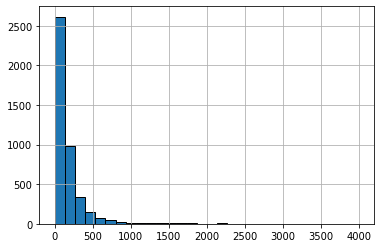

In [33]:
games['size'].hist(bins=30, ec='black')

In [34]:
games['size'].describe()

count    4311.000000
mean      175.956867
std       286.627800
min         0.215840
25%        40.736256
50%        97.300480
75%       208.517632
max      4005.591040
Name: size, dtype: float64

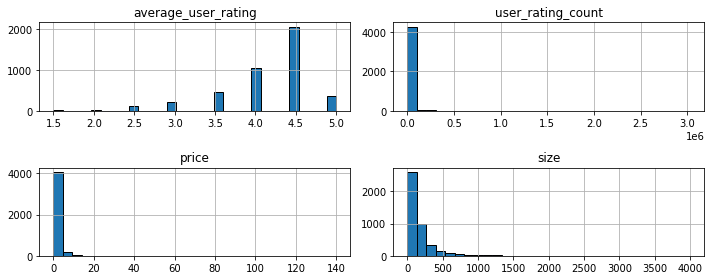

In [35]:
games.hist(figsize = (10, 4), bins = 30, ec = 'black');
# This line prints the four plots without overlap
plt.tight_layout()

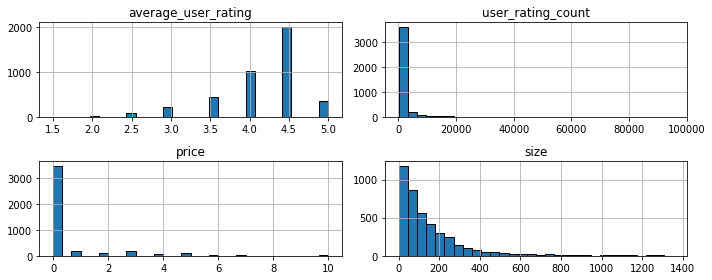

In [36]:
filter_price = games['price'] <= games['price'].quantile(0.99)
filter_user_rating_count = games['user_rating_count'] \
                          <= games['user_rating_count'].quantile(0.99)
filter_size = games['size'] <= games['size'].quantile(0.99)
filter_exclude_top_1_percent = filter_price \
                               & filter_user_rating_count \
                               & filter_size
games[filter_exclude_top_1_percent].hist(figsize = (10, 4),\
                                         bins = 30, ec = 'black');
# This line prints the four plots without overlap
plt.tight_layout()

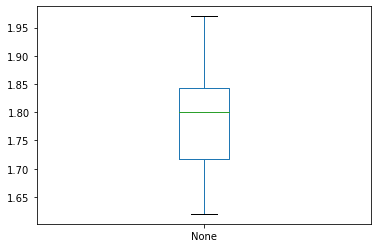

In [37]:
mens_heights.plot(kind='box')

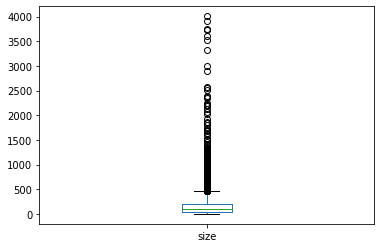

In [38]:
games['size'].plot(kind='box')

In [39]:
games['age_rating'].value_counts()

4+     2287
9+      948
12+     925
17+     151
Name: age_rating, dtype: int64

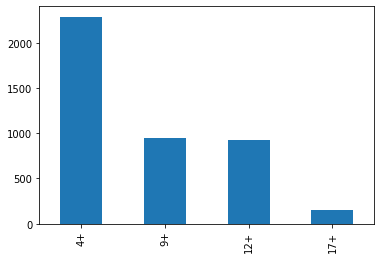

In [40]:
games['age_rating'].value_counts().plot(kind = 'bar')

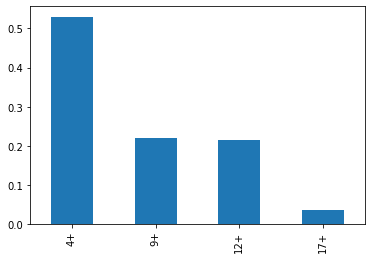

In [41]:
games['age_rating'].value_counts(normalize=True).plot(kind='bar')

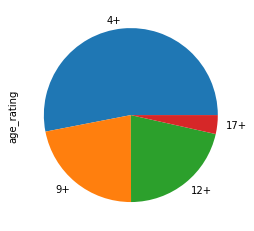

In [42]:
games['age_rating'].value_counts().plot(kind = 'pie')

In [43]:
percentages = 100*games['age_rating'].value_counts(normalize=True)
for k, x in percentages.items():
    print(f'{k}: {x:0.1f}%')

4+: 53.1%
9+: 22.0%
12+: 21.5%
17+: 3.5%


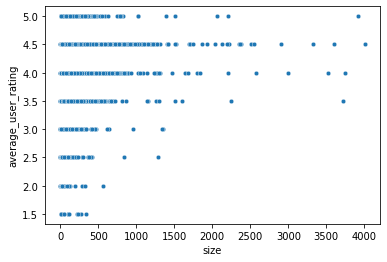

In [44]:
sns.scatterplot(x='size', y='average_user_rating',\
                data=games, \
                # this is for controlling the size of the points
                s=20)

In [45]:
ratings_mapping = {1.5: '1_poor', 2.: '1_poor',\
                   2.5: '1_poor', 3: '1_poor',\
                   3.5: '2_fair', 4. : '2_fair',\
                   4.5: '3_good',5. : '4_excellent'}
games['cat_rating'] = games['average_user_rating']\
                      .map(ratings_mapping)

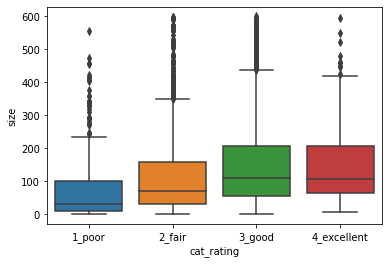

In [46]:
sns.boxplot(x='cat_rating', y='size', \
            data=games[games['size'] <= 600], \
            order=['1_poor', '2_fair', '3_good', '4_excellent'])

In [47]:
pd.crosstab(games['age_rating'], games['cat_rating'])

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,57,327,466,75
17+,11,59,68,13
4+,238,821,1029,199
9+,57,309,499,83


In [48]:
100*pd.crosstab(games['age_rating'],\
                games['cat_rating'], \
                normalize='index')

cat_rating,1_poor,2_fair,3_good,4_excellent
age_rating,,,,
12+,6.162162,35.351351,50.378378,8.108108
17+,7.284768,39.072848,45.033113,8.609272
4+,10.406646,35.898557,44.993441,8.701355
9+,6.012658,32.594937,52.637131,8.755274


In [49]:
games['price'].unique()

array([  2.99,   1.99,   0.  ,   0.99,   5.99,   7.99,   4.99,   3.99,
         9.99,  19.99,   6.99,  11.99,   8.99, 139.99,  14.99,  59.99])

In [50]:
games['price'] = games['price'].round()

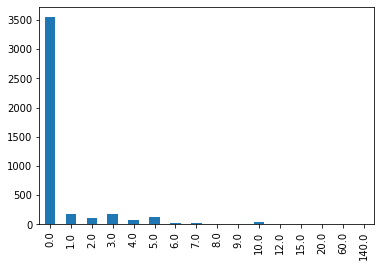

In [51]:
games['price'].value_counts().sort_index().plot(kind='bar')

In [52]:
games['cat_price'] = (games['price'] == 0).astype(int)\
                      .map({0:'paid', 1:'free'})

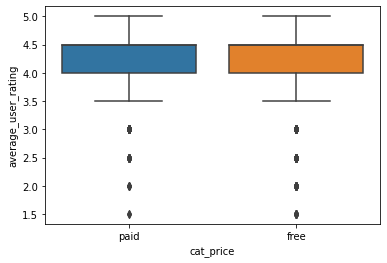

In [53]:
sns.boxplot(x='cat_price', y='average_user_rating', \
            data=games)

In [63]:
games['languages'] = games['languages'].fillna('EN')

In [64]:
number_of_languages = games['languages'].str.split(',').apply(lambda x: len(x))
games['multilingual'] = number_of_languages == 1
games['multilingual'] = games['multilingual'].astype(int).map({0:'multilingual', 1:'monolingual'})

In [66]:
games['free_game'] = (games['price'] == 0).astype(int).map({0:'paid', 1:'free'})

In [67]:
games['price_language'] = games['free_game'] + '-' + games['multilingual']

In [68]:
games['price_language'].value_counts()

free-monolingual     2105
free-multilingual    1439
paid-monolingual      467
paid-multilingual     300
Name: price_language, dtype: int64

In [69]:
games.groupby('price_language')['average_user_rating'].describe()

,count,mean,std,min,25%,50%,75%,max
price_language,,,,,,,,
free-monolingual,2105.0,4.129216,0.634426,1.5,4.0,4.5,4.5,5.0
free-multilingual,1439.0,4.227589,0.525904,1.5,4.0,4.5,4.5,5.0
paid-monolingual,467.0,4.064240,0.657693,1.5,3.5,4.0,4.5,5.0
paid-multilingual,300.0,4.251667,0.486435,2.5,4.0,4.5,4.5,5.0
